# Statsmodels 

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [7]:
df.index = index

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

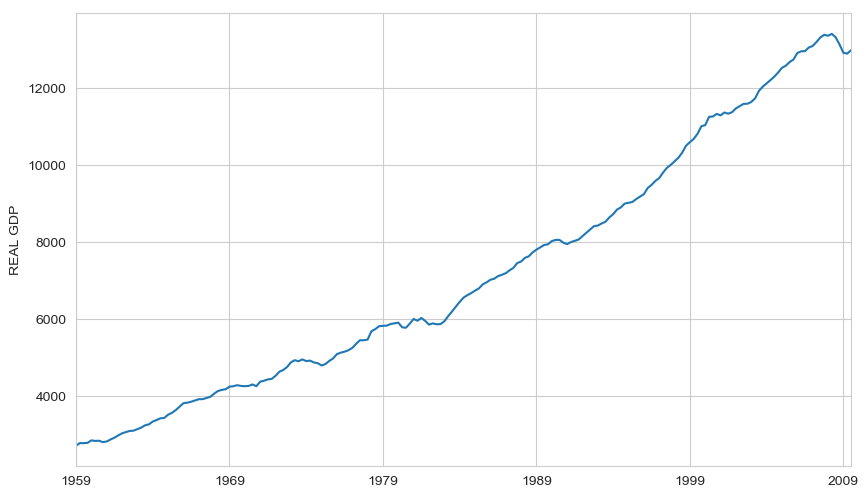

In [13]:
plt.figure(figsize=[10,6],dpi=100)
df['realgdp'].plot()
plt.ylabel("REAL GDP")

## Using Statsmodels to get the trend

In [14]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [15]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


In [16]:
type(gdp_cycle)

pandas.core.series.Series

In [17]:
df["trend"] = gdp_trend

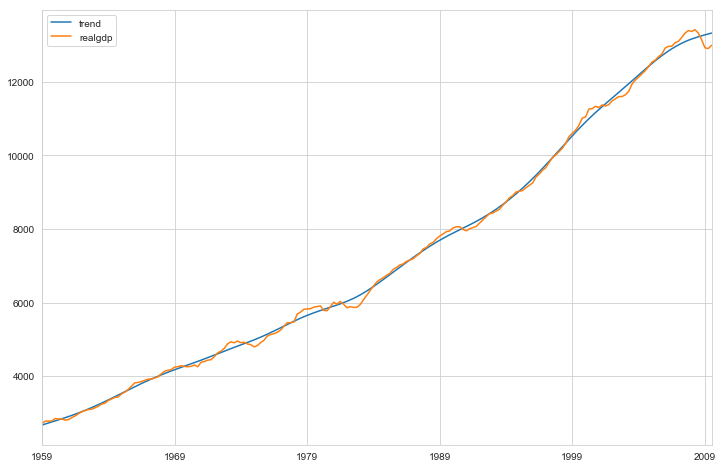

In [18]:
df[['trend','realgdp']].plot(figsize=[12,8])

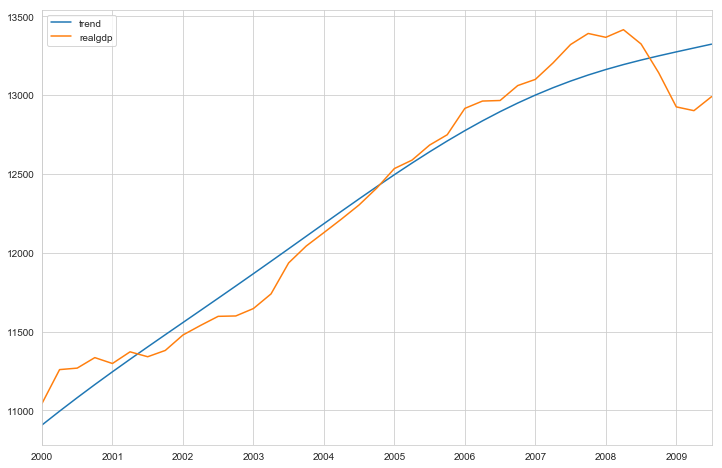

In [19]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))

In [45]:
accident = pd.read_csv('motor-vehicle-fatalities-by-month.csv',index_col="YEAR_AND_MONTH")

In [46]:
accident.dropna(inplace=True)
accident.index = pd.to_datetime(accident.index)

In [47]:
accident.head()

,FATAL VICTIMS
YEAR_AND_MONTH,
1996-01-01,39
1996-02-01,32
1996-03-01,31
1996-04-01,36
1996-05-01,31


# SMA
## Simple Moving Average

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. 

 - The SMA is a technical indicator for determining if an asset price will continue or reverse a bull or bear trend.
 - The SMA is calculated as the arithmetic average of an asset's price over some period.
 - The SMA can be enhanced as an exponential moving average (EMA) that more heavily weights recent price action.

In [48]:
accident['6-month-SMA']=accident['FATAL VICTIMS'].rolling(window=6).mean()
accident['12-month-SMA']=accident['FATAL VICTIMS'].rolling(window=12).mean()

In [49]:
accident.head()

,FATAL VICTIMS,6-month-SMA,12-month-SMA
YEAR_AND_MONTH,,,
1996-01-01,39,NaN,NaN
1996-02-01,32,NaN,NaN
1996-03-01,31,NaN,NaN
1996-04-01,36,NaN,NaN
1996-05-01,31,NaN,NaN


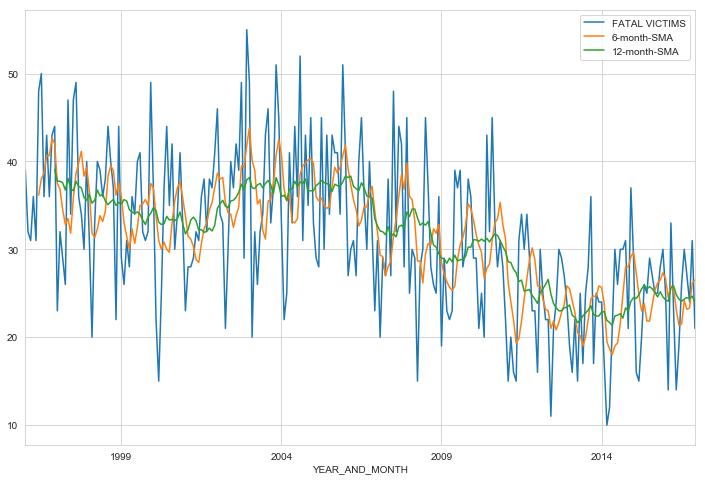

In [50]:
accident.plot(figsize=(12,8))

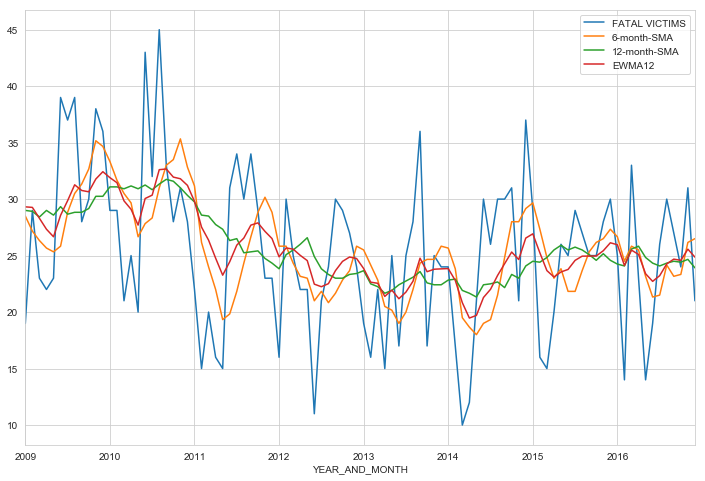

In [54]:
accident["2009-01-01":].plot(figsize=(12,8))

SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

# EWMA
## Exponentially-weighted moving average  

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

In [58]:
accident['EWMA12'] = accident['FATAL VICTIMS'].ewm(span=12).mean()

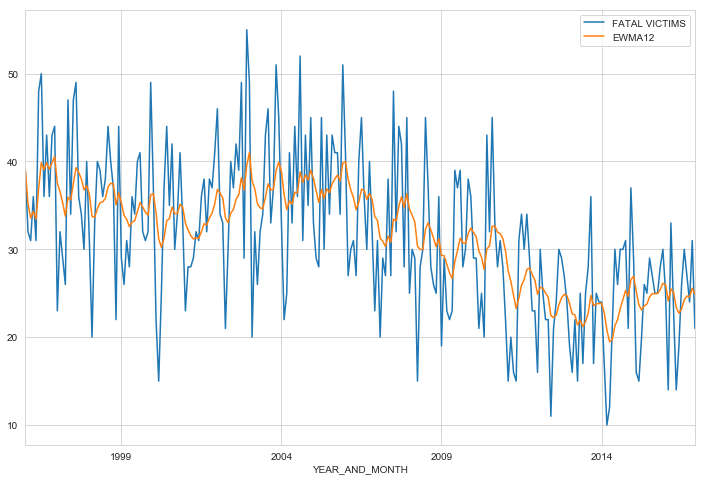

In [59]:
accident[['FATAL VICTIMS','EWMA12']].plot(figsize=(12,8))